In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Sleep_health_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Gender, Occupation, BMI category, Blood Pressure, Sleep Disorder are non-integer features. These need to be converted or encoded.

In [4]:
df = data.drop('Person ID', axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [7]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

normal and normal weight are the same. so these can be merged.

In [8]:
to_combine = ['Normal', 'Normal Weight']
df['BMI Category'] = df['BMI Category'].replace(to_combine, 'Normal')

In [9]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

Blood Pressure needs to be split into upper and lower values. These are non-integer features, so, convert them to integers.

In [10]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [11]:
# renaming as lower_bp and upper_bp
df = df.rename(columns={0: 'bp_upper', 1: 'bp_lower'})
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [12]:
# convert to int
df['bp_upper'] = df['bp_upper'].astype('int')
df['bp_lower'] = df['bp_lower'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  bp_upper                 374 non-null    int32  
 12  bp_lower                 374 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 35.2+ KB


In [14]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


# Exploratory Data Analysis

For target variable:

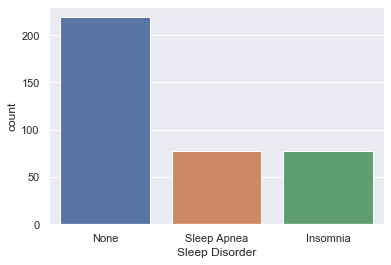

In [15]:
sns.countplot(x='Sleep Disorder', data=df)
plt.show()

Group the two sleep disorders.

In [16]:
to_combine = ['Sleep Apnea', 'Insomnia']
df['Sleep Disorder'] = df['Sleep Disorder'].replace(to_combine, 'Sleep Disorder')

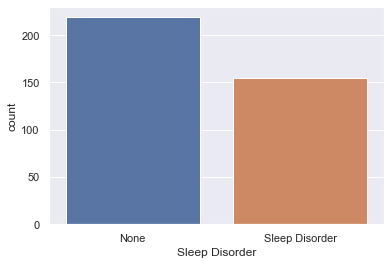

In [17]:
sns.countplot(x='Sleep Disorder', data=df)
plt.show()

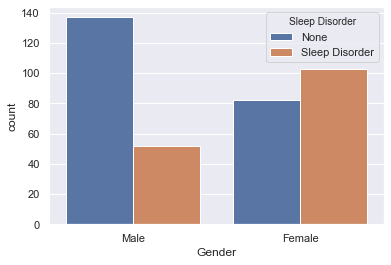

In [18]:
sns.countplot(x='Gender', data = df, hue='Sleep Disorder')
plt.show()

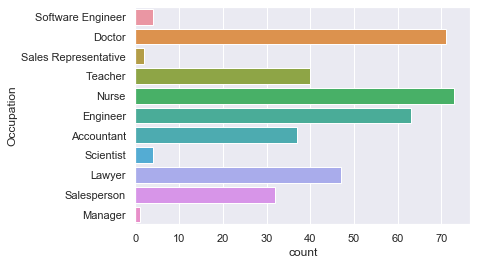

In [19]:
sns.countplot(y='Occupation', data = df)
plt.show()

In [20]:
to_combine = ['Software Engineer', 'Sales Representative', 'Scientist', 'Manager']
df['Occupation'] = df['Occupation'].replace(to_combine, 'Other')

In [21]:
df['Occupation'].unique()

array(['Other', 'Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant',
       'Lawyer', 'Salesperson'], dtype=object)

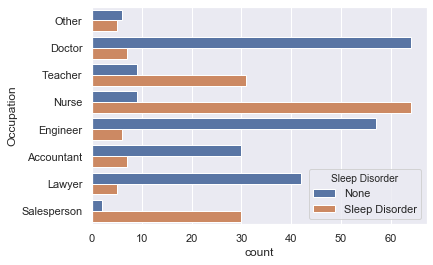

In [22]:
sns.countplot(y='Occupation', data = df, hue = 'Sleep Disorder')
plt.show()

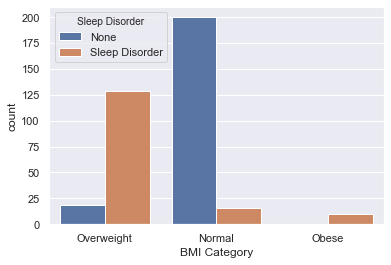

In [23]:
sns.countplot(x='BMI Category', data = df, hue='Sleep Disorder')
plt.show()

All Obese people and most of the Overweight people have a sleeping disorder.  

# Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [25]:
df_transformed = df.copy()
df_transformed.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90
4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90


In [26]:
df_transformed['Gender'] = enc.fit_transform(df['Gender'])
df_transformed

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,1,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,1,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,1,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,1,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90
4,1,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Disorder,140,95
370,0,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Disorder,140,95
371,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Disorder,140,95
372,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Disorder,140,95


In [27]:
df_transformed['Occupation'] = enc.fit_transform(df['Occupation'])
df_transformed['BMI Category'] = enc.fit_transform(df['BMI Category'])
df_transformed['Sleep Disorder'] = enc.fit_transform(df['Sleep Disorder'])
df_transformed

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,1,27,5,6.1,6,42,6,2,77,4200,0,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,1,28,5,5.9,4,30,8,1,85,3000,1,140,90
4,1,28,5,5.9,4,30,8,1,85,3000,1,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,4,8.1,9,75,3,2,68,7000,1,140,95
370,0,59,4,8.0,9,75,3,2,68,7000,1,140,95
371,0,59,4,8.1,9,75,3,2,68,7000,1,140,95
372,0,59,4,8.1,9,75,3,2,68,7000,1,140,95


In [28]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  bp_upper                 374 non-null    int32  
 12  bp_lower                 374 non-null    int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 29.3 KB


# Model

In [29]:
df_transformed.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'bp_upper', 'bp_lower'],
      dtype='object')

In [30]:
inputs = df_transformed[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'bp_upper', 'bp_lower']]

In [31]:
target = df_transformed['Sleep Disorder']

# Train and Test split

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3, random_state=10)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

c:\Users\Vatsu.Daita\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
log_pred = reg.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
c = confusion_matrix(y_test, log_pred)
c

array([[64,  7],
       [ 3, 39]], dtype=int64)

In [49]:
print('accuracy:',accuracy_score(y_test, log_pred))
print('precision:',precision_score(y_test,log_pred))
print('recall:',recall_score(y_test, log_pred))
print('F1-score:', f1_score(y_test, log_pred))

accuracy: 0.911504424778761
precision: 0.8478260869565217
recall: 0.9285714285714286
F1-score: 0.8863636363636365


# SVM

In [41]:
from sklearn.svm import SVC

In [42]:
svm = SVC(kernel="linear", gamma='scale', C=1.0) # model defining
svm.fit(x_train,y_train) # fit to our train data

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
svm_pred = svm.predict(x_test)

In [44]:
c_svm = confusion_matrix(y_test, svm_pred)
c_svm

array([[66,  5],
       [ 3, 39]], dtype=int64)

In [50]:
print('accuracy:',accuracy_score(y_test, svm_pred))
print('precision:',precision_score(y_test,svm_pred))
print('recall:',recall_score(y_test, svm_pred))
print('F1-score:', f1_score(y_test, svm_pred))

accuracy: 0.9292035398230089
precision: 0.8863636363636364
recall: 0.9285714285714286
F1-score: 0.9069767441860465


# Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
gnb_pred = gnb.predict(x_test)

In [54]:
confusion_matrix(y_test, gnb_pred)

array([[64,  7],
       [ 3, 39]], dtype=int64)

In [55]:
print('accuracy:',accuracy_score(y_test, gnb_pred))
print('precision:',precision_score(y_test,gnb_pred))
print('recall:',recall_score(y_test, gnb_pred))
print('F1-score:', f1_score(y_test, gnb_pred))

accuracy: 0.911504424778761
precision: 0.8478260869565217
recall: 0.9285714285714286
F1-score: 0.8863636363636365
